In [4]:
import pandas as pd
import numpy as np

data_fake=pd.read_csv('/content/drive/MyDrive/Fake (1).csv')
data_true=pd.read_csv('/content/drive/MyDrive/True (1).csv')

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 150)
import os
import gc
gc.enable()
import time
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from scipy.sparse import hstack
from scipy import stats
%matplotlib inline
from datetime import timedelta
import datetime as dt
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 10]
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
import warnings
warnings.filterwarnings('ignore')
import urllib        #for url stuff

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import text
from IPython.display import display
from tqdm import tqdm
from collections import Counter
import ast


from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
import scipy.stats as stats

import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

import seaborn as sns #for making plots
import matplotlib.pyplot as plt # for plotting
import os  # for os commands

import gensim
from gensim import corpora, models, similarities
import logging
import tempfile
from nltk.corpus import stopwords
from string import punctuation
from collections import OrderedDict

from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE


from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook
output_notebook()

In [6]:
data_fake['class']=0
data_true['class']=1

In [7]:
data_fake.shape

(23481, 5)

In [8]:
data_true.shape

(21417, 5)

In [9]:
# for i in range(23480, 11000, -1):
#     if i in data_fake.index:
#         data_fake.drop([i], axis=0, inplace=True)
#         print(f"Index {i} removed")
#     else:
#         print(f"Index {i} does not exist in the DataFrame.")


In [10]:
# for i in range(23480, 9000, -1):
#     if i in data_true.index:
#         data_true.drop([i], axis=0, inplace=True)
#         print(f"Index {i} removed.")
#     else:
#         print(f"Index {i} does not exist in the DataFrame.")


In [11]:
data_merge=pd.concat([data_fake,data_true],axis=0)
data_merge.shape

(44898, 5)

In [12]:
# Shuffle
from sklearn.utils import shuffle

data_merge = shuffle(data_merge).reset_index(drop=True)

display(data_merge)

,title,text,subject,date,class
0,Barca closed soccer stadium to show support fo...,BARCELONA (Reuters) - Barcelona president Jose...,worldnews,"October 1, 2017",1
1,China says foreign firms welcome benefits from...,BEIJING (Reuters) - Foreign companies in China...,worldnews,"October 19, 2017",1
2,Vietnam releases water from brimming reservoir...,"DANANG, Vietnam (Reuters) - Vietnam released w...",worldnews,"November 7, 2017",1
3,Zimbabweans pour onto Harare streets in jubila...,HARARE (Reuters) - Thousands of Zimbabweans po...,worldnews,"November 21, 2017",1
4,"India's Modi remains overwhelmingly popular, s...",NEW DELHI (Reuters) - Nearly nine out of 10 In...,worldnews,"November 16, 2017",1
...,...,...,...,...,...
44893,OBAMA’S LIST OF 21 MEDAL OF FREEDOM Recipients...,,left-news,"Nov 16, 2016",0
44894,DEAR DEMOCRATS AND LIBERALS…Stop Complaining A...,Ouch!,politics,"Nov 21, 2016",0
44895,HYSTERICAL VIDEO: SATURDAY NIGHT LIVE DOES CNN,PRETTY FUNNY STUFF-MAKE SURE TO WATCH TO THE END.,politics,"Apr 5, 2015",0
44896,SHOCKING REPORT: 99.5% Of Professors From Top ...,These leftist professors aren t just donating ...,politics,"Oct 26, 2015",0


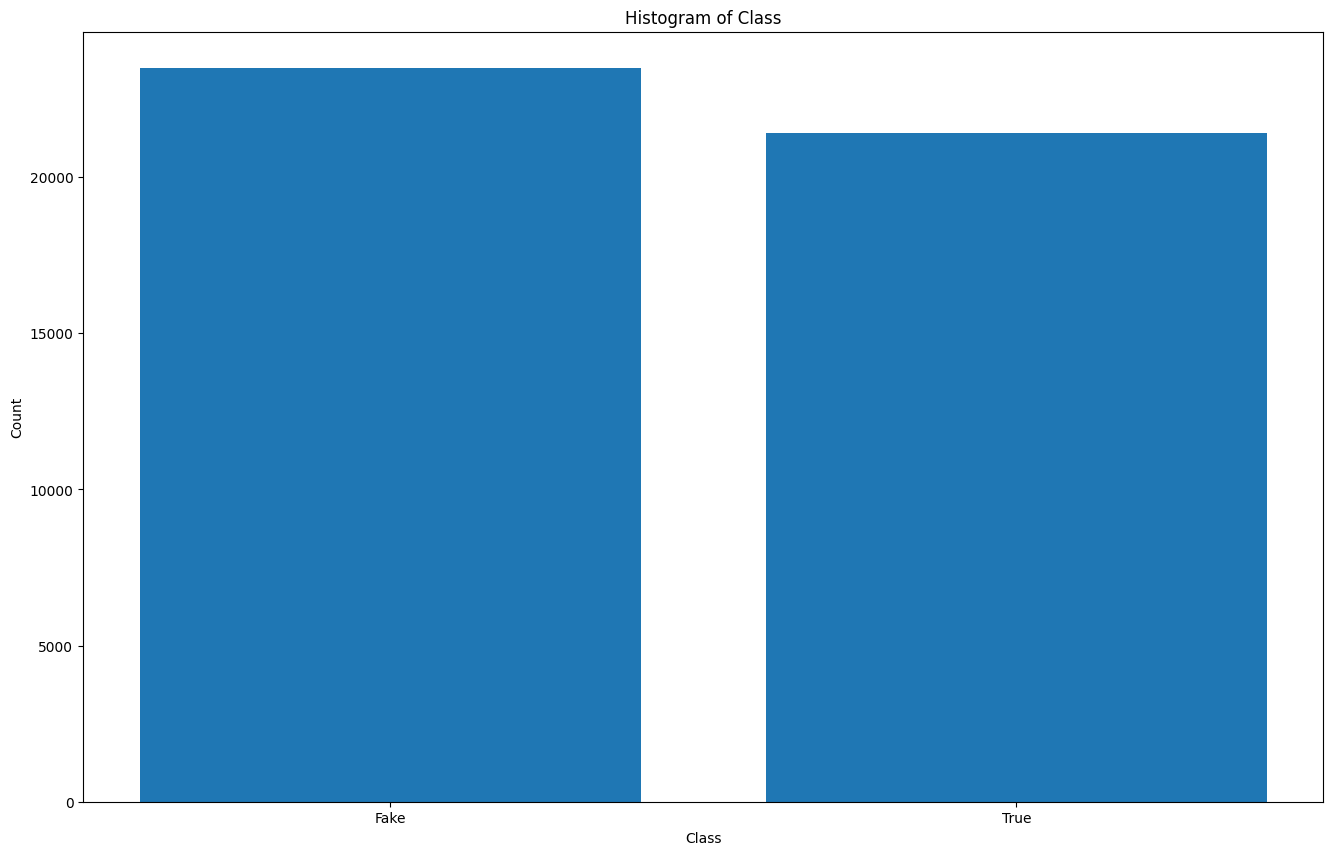

In [13]:
import matplotlib.pyplot as plt
target = data_merge['class']
counts = target.value_counts()
plt.bar(['Fake', 'True'], counts.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Histogram of Class')
plt.show()


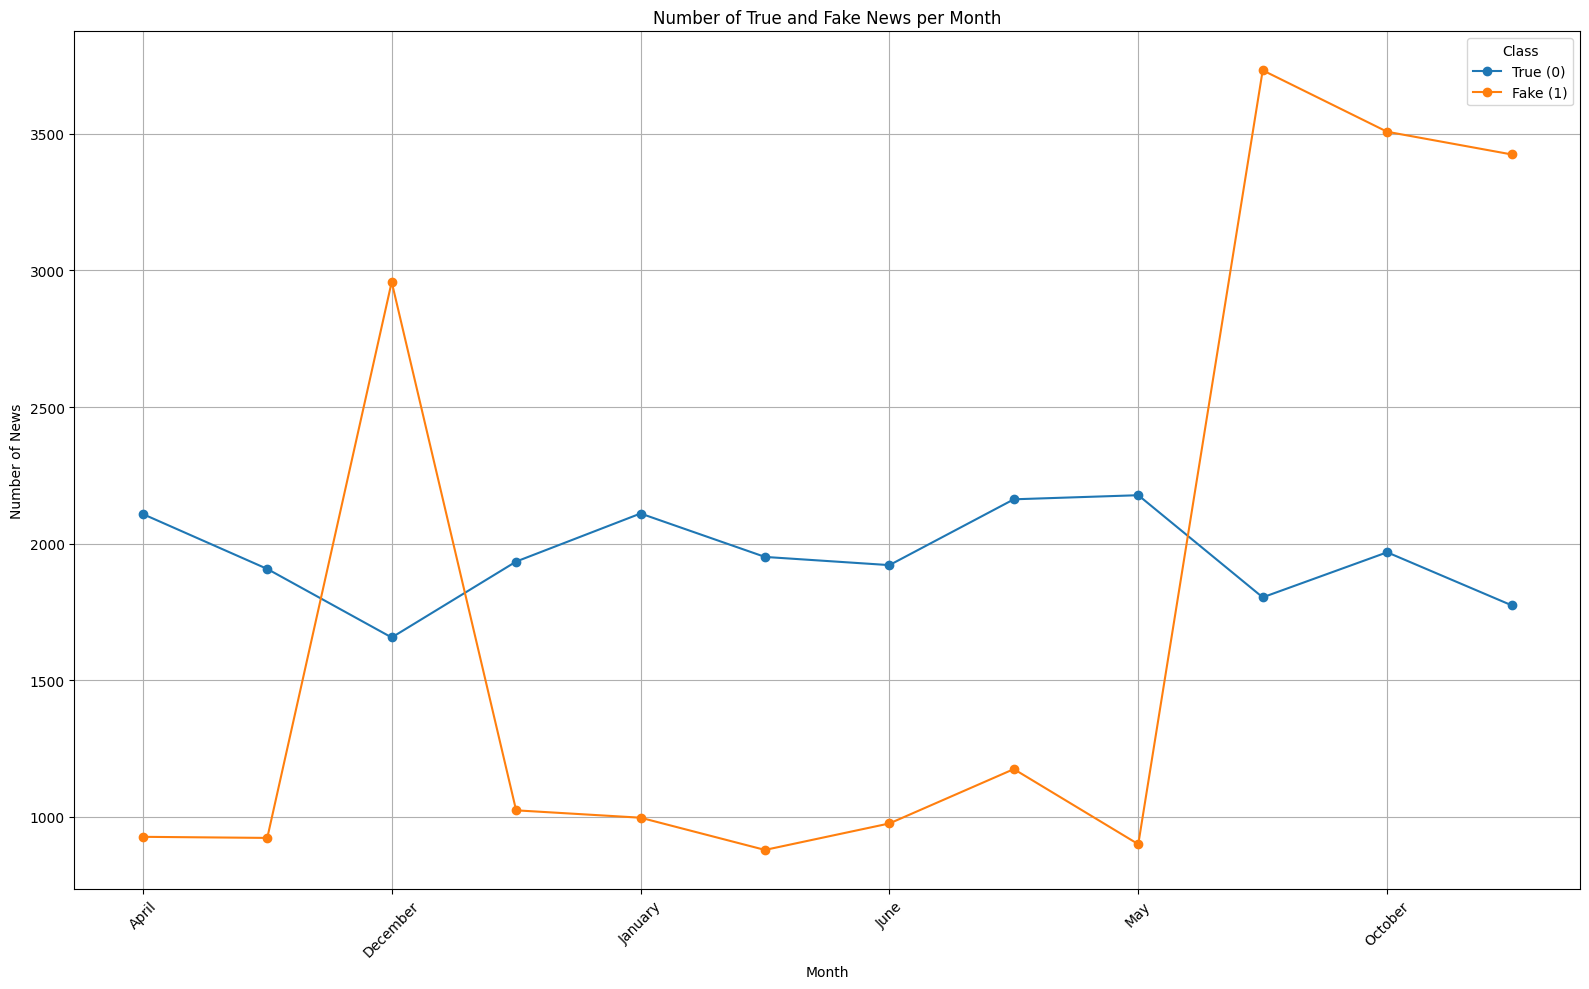

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
data_merge = data_merge[pd.to_datetime(data_merge['date'], errors='coerce').notnull()]
data_merge['date'] = pd.to_datetime(data_merge['date'])
data_merge['month'] = data_merge['date'].dt.month_name()
counts = data_merge.groupby(['month', 'class']).size().unstack(fill_value=0)
counts.plot(kind='line', marker='o')
plt.xlabel('Month')
plt.ylabel('Number of News')
plt.title('Number of True and Fake News per Month')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Class', labels=['True (0)', 'Fake (1)'])
plt.tight_layout()
plt.show()

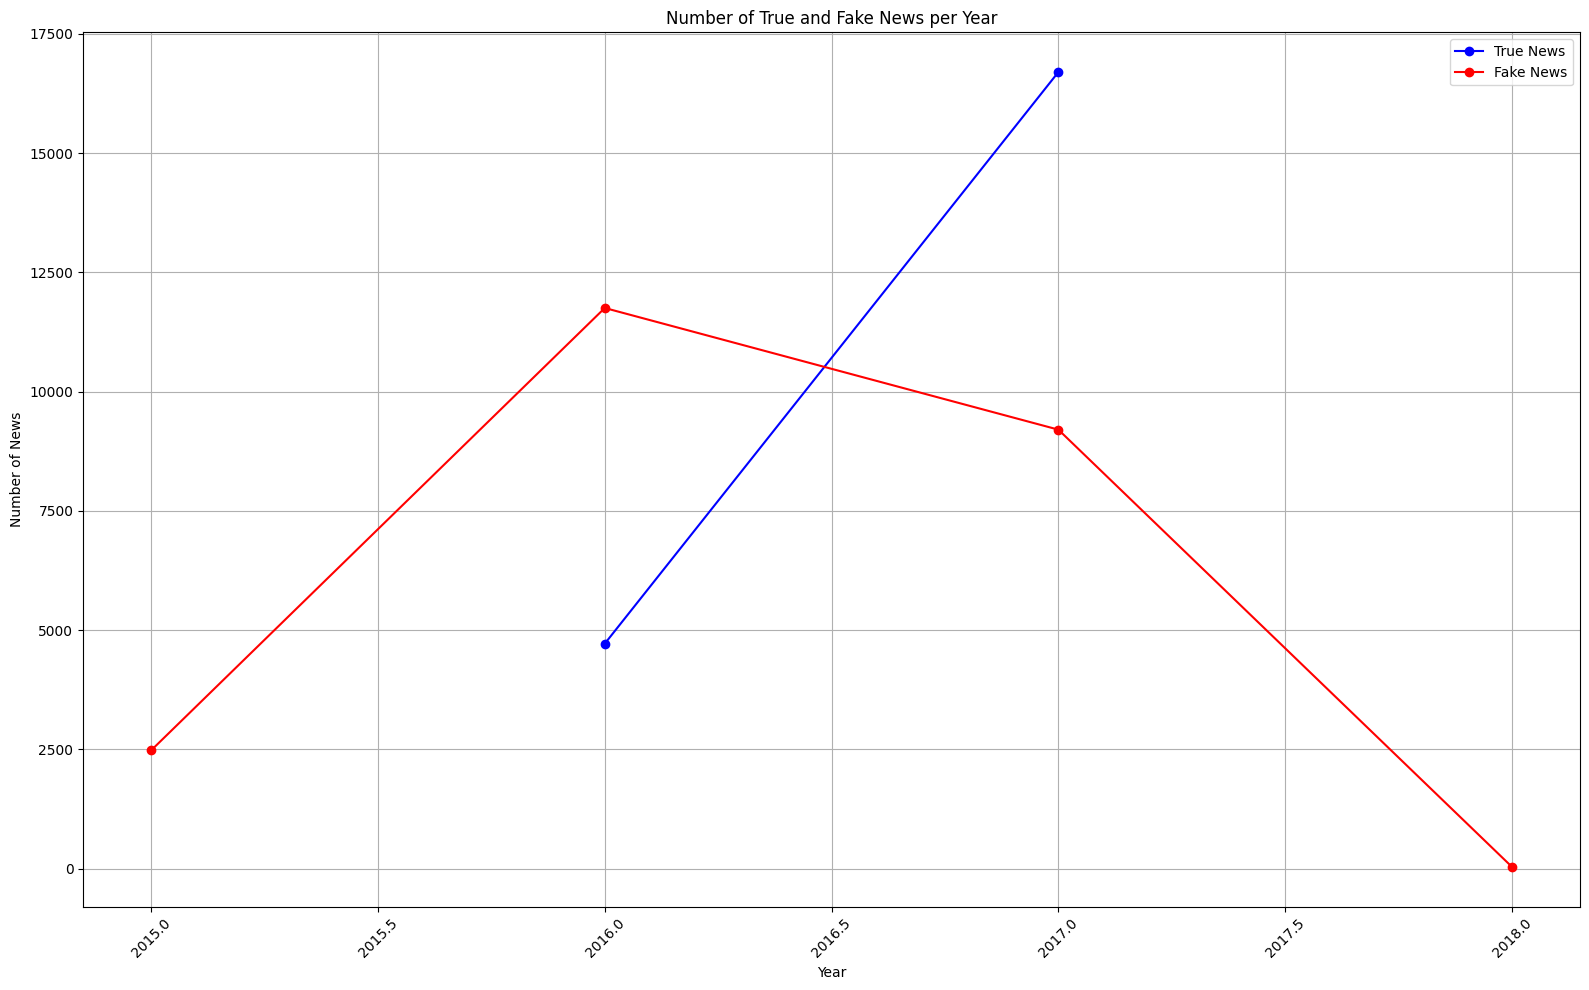

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
data_merge = data_merge[pd.to_datetime(data_merge['date'], errors='coerce').notnull()]
data_merge['date'] = pd.to_datetime(data_merge['date'])
data_merge['year'] = data_merge['date'].dt.year
true_news = data_merge[data_merge['class'] == 1]
fake_news = data_merge[data_merge['class'] == 0]
true_counts = true_news.groupby('year').size()
fake_counts = fake_news.groupby('year').size()
plt.plot(true_counts.index, true_counts.values, marker='o', label='True News', color='blue')
plt.plot(fake_counts.index, fake_counts.values, marker='o', label='Fake News', color='red')
plt.xlabel('Year')
plt.ylabel('Number of News')
plt.title('Number of True and Fake News per Year')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [16]:
data_merge.columns

Index(['title', 'text', 'subject', 'date', 'class', 'month', 'year'], dtype='object')

In [17]:
data_merge.isnull().sum()

title      0
text       0
subject    0
date       0
class      0
month      0
year       0
dtype: int64

In [18]:
coloumns=['text','class','date']
data=data_merge[coloumns]
data.head()

,text,class,date
0,BARCELONA (Reuters) - Barcelona president Jose...,1,2017-10-01
1,BEIJING (Reuters) - Foreign companies in China...,1,2017-10-19
2,"DANANG, Vietnam (Reuters) - Vietnam released w...",1,2017-11-07
3,HARARE (Reuters) - Thousands of Zimbabweans po...,1,2017-11-21
4,NEW DELHI (Reuters) - Nearly nine out of 10 In...,1,2017-11-16


In [19]:
data.isnull().sum()

text     0
class    0
date     0
dtype: int64

In [20]:
data.columns

Index(['text', 'class', 'date'], dtype='object')

In [21]:
pip install nltk

In [22]:
print(data.iloc[1][0])

BEIJING (Reuters) - Foreign companies in China have welcomed the ruling Communist Party to set up cells in their firms, a senior official said on Thursday, though some executives have expressed concern about the party s growing role in their operations. The presence of party units has long been a fact of doing business in China, where the law requires companies, including foreign firms, to set up a party organization. Many executives had long seen the measure as symbolic. But as President Xi Jinping s efforts to strengthen the party s role throughout society have reached the local operations of foreign companies, some executives told Reuters earlier this year that they were concerned about the resulting demands they face.  Party cells in foreign firms were well-received as a way of helping them understand Chinese policies and resolving disputes, Qi Yu, a deputy head of the Communist Party s Organisation Department, told a news briefing on the sidelines of a key twice-a-decade party con

In [23]:
# import nltk
# from nltk.tokenize import sent_tokenize, word_tokenize

In [24]:
# nltk.download('punkt')

In [25]:
# nltk.download('stopwords')

In [26]:
# # Tokenize the text into sentences
# for i in range(1):
#   text=data.iloc[1][0]
#   sentences = sent_tokenize(text)

#   # Define a function to remove stop words from a list of words
#   def remove_stopwords(sentence):
#       stop_words = set(nltk.corpus.stopwords.words('english'))
#       words = word_tokenize(sentence)
#       filtered_words = [word for word in words if word.lower() not in stop_words]
#       return ' '.join(filtered_words)

#   # Remove stop words from each sentence
#   sentences_without_stopwords = [remove_stopwords(sentence) for sentence in sentences]

#   # Print the processed sentences
#   for sentence in sentences_without_stopwords:
#       print(sentence)


In [27]:
# pip install pandas spacy


In [28]:
# !python -m spacy download en_core_web_sm


In [29]:
import spacy
import pandas as pd
nlp = spacy.load("en_core_web_sm")
stop_words = nlp.Defaults.stop_words
df_stop_words = pd.DataFrame(stop_words, columns=["Stop Words"])
print(df_stop_words)


    Stop Words
0           on
1           us
2         then
3     moreover
4          get
..         ...
321      there
322    thereby
323        ‘ve
324        all
325      three

[326 rows x 1 columns]


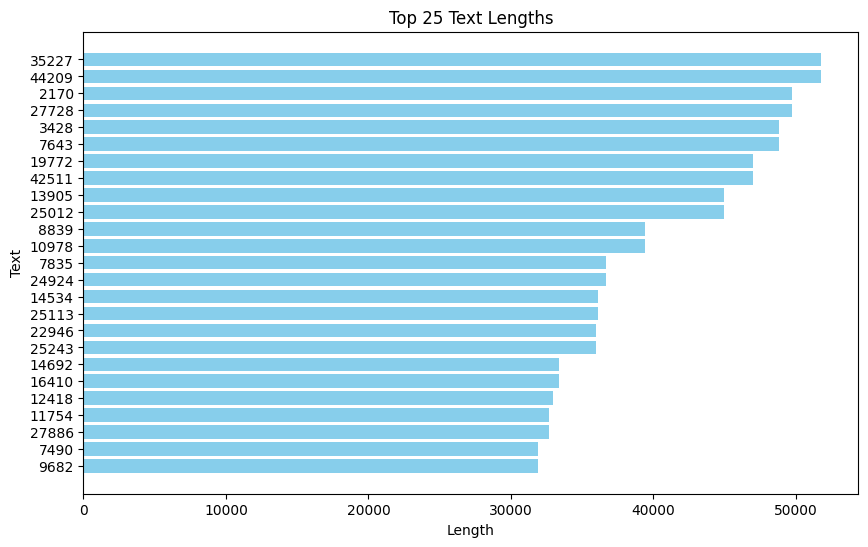

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
data['text_length'] = data['text'].apply(len)
top_25_lengths = data['text_length'].nlargest(25)
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_25_lengths)), top_25_lengths.values, color='skyblue')
plt.yticks(range(len(top_25_lengths)), top_25_lengths.index)
plt.xlabel('Length')
plt.ylabel('Text')
plt.title('Top 25 Text Lengths')
plt.gca().invert_yaxis()  # Invert y-axis to display the longest text at the top
plt.show()


In [31]:
def worddrop(text) :
  text = text. lower()
  text = re. sub('\[.*?\]','', text)
  text = re. sub("\\W", " ", text)
  text = re. sub('https?://\S+|www. \S+','', text)
  text = re. sub('<.*?›+','',text)
  text=re.sub('[%s]' % re.escape(string.punctuation),'',text)
  text=re.sub('\w*\d\w*','',text)
  return text

In [32]:
import re
import string


data_copy = data.copy()

data_copy['text'] = data_copy['text'].apply(worddrop)


In [33]:
data_copy.head()

,text,class,date,text_length
0,barcelona reuters barcelona president jose...,1,2017-10-01,3002
1,beijing reuters foreign companies in china...,1,2017-10-19,2300
2,danang vietnam reuters vietnam released w...,1,2017-11-07,1941
3,harare reuters thousands of zimbabweans po...,1,2017-11-21,379
4,new delhi reuters nearly nine out of indi...,1,2017-11-16,2981


In [34]:
data_copy.columns
data_copy.shape

(44888, 4)

In [ ]:
import pandas as pd
import spacy

# Load the spaCy English language model
nlp = spacy.load("en_core_web_sm")

# Customize spaCy's stopword list to remove "not"
stop_words = set(nlp.Defaults.stop_words)
nlp.Defaults.stop_words = stop_words

def remove_stopwords_spacy(text):
    # Process the text with spaCy
    doc = nlp(text)
    # Generate a list of tokens that are not stop words
    filtered_text = [token.text for token in doc if token.text.lower() not in nlp.Defaults.stop_words]
    # Join the tokens back into a single string
    return " ".join(filtered_text)

if __name__ == "__main__":
    # Assuming 'data' is your DataFrame with columns ['text', 'class']

    # Create a new column 'clean_text' and apply remove_stopwords_spacy function to 'text' column
    p = data_copy['text'].apply(remove_stopwords_spacy)
    data_copy['text'] = ' '
    data_copy['text'] = p

    # Print the updated DataFrame
    print(data_copy)


                                                    text  class       date  \
0      barcelona   reuters     barcelona president jo...      1 2017-10-01   
1      beijing   reuters     foreign companies china ...      1 2017-10-19   
2      danang   vietnam   reuters     vietnam release...      1 2017-11-07   
3      harare   reuters     thousands zimbabweans pou...      1 2017-11-21   
4      new delhi   reuters     nearly   indians hold ...      1 2017-11-16   
...                                                  ...    ...        ...   
44893                                                         0 2016-11-16   
44894                                               ouch      0 2016-11-21   
44895                  pretty funny stuff sure watch end      0 2015-04-05   
44896  leftist professors aren t donating chump chang...      0 2015-10-26   
44897  mainstream media anonymous cia sources claim r...      0 2016-12-19   

       text_length  
0             3002  
1             2300  


In [ ]:
print(data_copy.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44888 entries, 0 to 44897
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   text         44888 non-null  object        
 1   class        44888 non-null  int64         
 2   date         44888 non-null  datetime64[ns]
 3   text_length  44888 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 2.7+ MB
None


In [ ]:
data_copy.describe()

,class,text_length
count,44888.000000,44888.000000
mean,0.477121,2469.629010
std,0.499482,2171.579042
min,0.000000,1.000000
25%,0.000000,1235.000000
50%,0.000000,2186.000000
75%,1.000000,3106.000000
max,1.000000,51794.000000


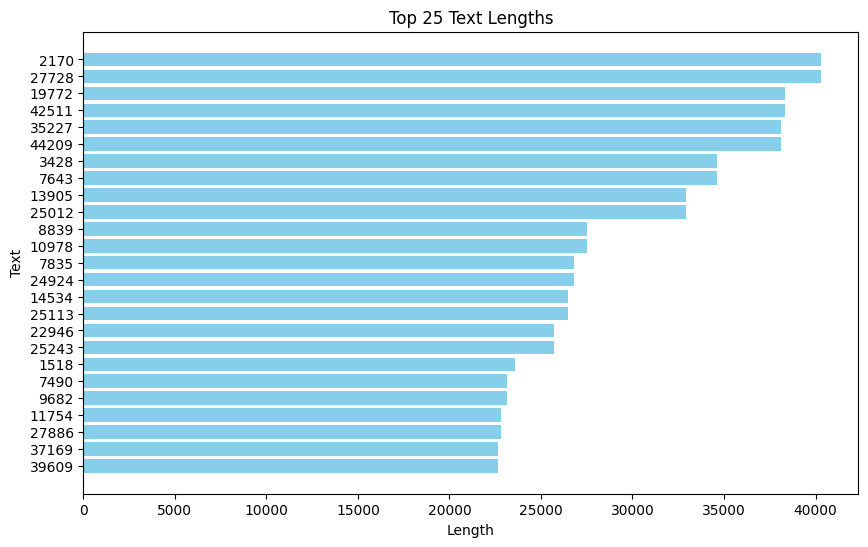

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
data_copy['text_length'] = data_copy['text'].apply(len)
top_25_lengths = data_copy['text_length'].nlargest(25)
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_25_lengths)), top_25_lengths.values, color='skyblue')
plt.yticks(range(len(top_25_lengths)), top_25_lengths.index)
plt.xlabel('Length')
plt.ylabel('Text')
plt.title('Top 25 Text Lengths')
plt.gca().invert_yaxis()  # Invert y-axis to display the longest text at the top
plt.show()


In [ ]:
data_copy.head()

,text,class,date,text_length
0,barcelona reuters barcelona president jo...,1,2017-10-01,1938
1,beijing reuters foreign companies china ...,1,2017-10-19,1712
2,danang vietnam reuters vietnam release...,1,2017-11-07,1418
3,harare reuters thousands zimbabweans pou...,1,2017-11-21,297
4,new delhi reuters nearly indians hold ...,1,2017-11-16,2035


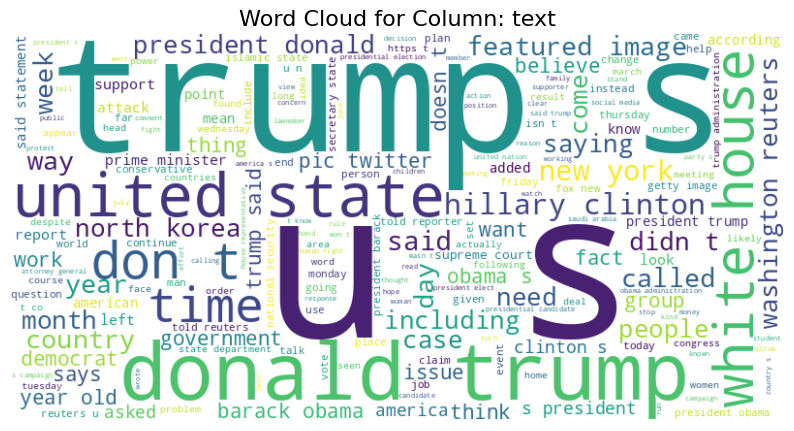

In [ ]:
# Install necessary libraries if you haven't already
# !pip install wordcloud matplotlib

# Import the required libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Define a function to generate word cloud for a given column
def generate_word_cloud(column):
    # Concatenate all text data in the specified column into a single string
    text = ' '.join(data_copy[column].dropna())

    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Plot the word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Column: {column}', fontsize=16)
    plt.axis('off')
    plt.show()

# Take input for column name
column_name = "text"

# Check if the column exists in the DataFrame
if column_name in data_copy.columns:
    generate_word_cloud(column_name)
else:
    print("Column not found in DataFrame.")


In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt
data_copy['date'] = pd.to_datetime(data_copy['date'])
# Find the most frequent dates
top_dates = data_copy['date'].value_counts().head(5)  # Change 5 to the number of top dates you want

print("Top Dates:")
print(top_dates)

Top Dates:
2017-12-20    197
2017-12-06    183
2017-11-09    182
2017-11-30    178
2017-10-13    172
Name: date, dtype: int64


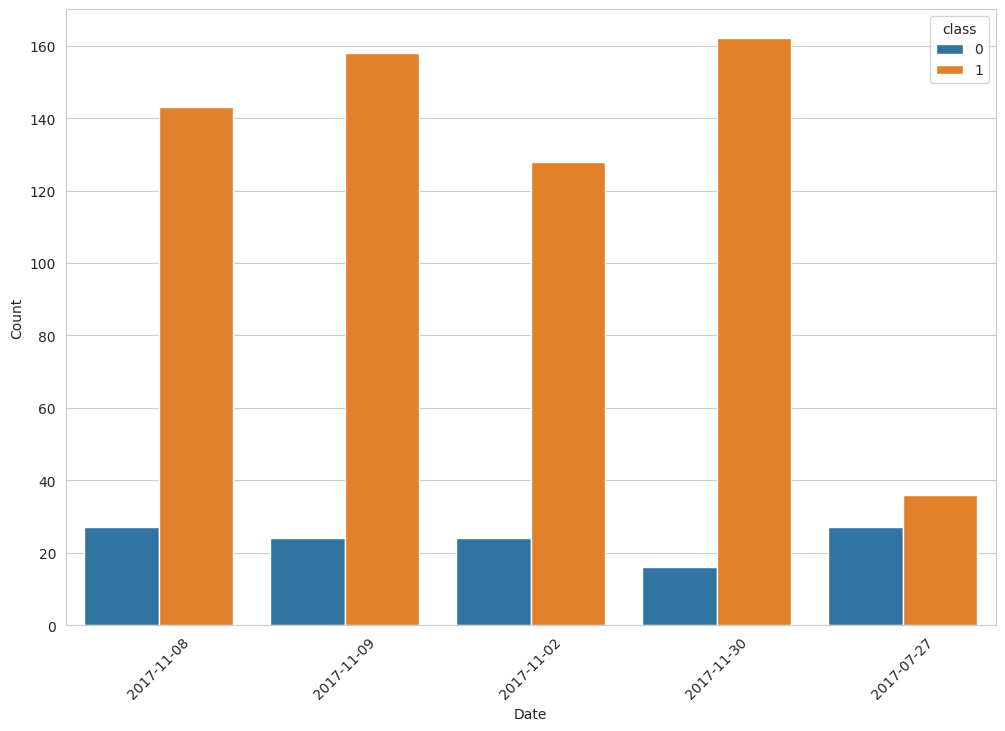

In [ ]:
#most occured dates and their class count

# Assuming 'date' is a column in your DataFrame
# If 'date' is not in datetime format, convert it
data_copy['date'] = pd.to_datetime(data_copy['date'])

# Filter the DataFrame to include only the dates you are interested in
frequent_dates = ['2017-11-30', '2017-11-02', '2017-07-27','2017-11-09','2017-11-08']  # Example frequent dates
filtered_data = data_copy[data_copy['date'].isin(frequent_dates)]

sns.set_style('whitegrid')
plt.figure(figsize=(12, 8))  # Adjust the size as needed
sns.countplot(x='date', hue='class', data=filtered_data)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.xlabel('Date')  # Label for the x-axis
plt.ylabel('Count')  # Label for the y-axis
plt.show()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


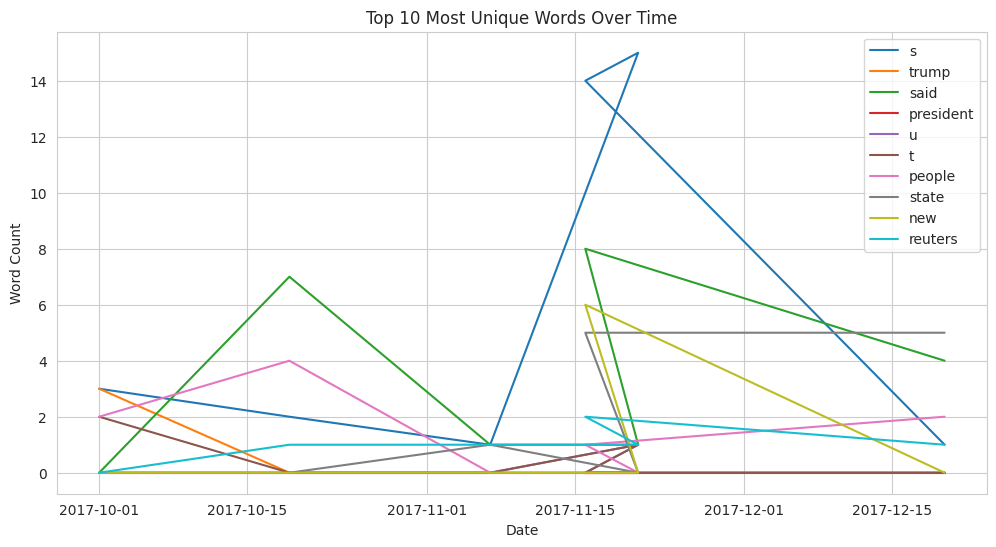

In [ ]:
#plot between most occured words and most occured dates
#line plot showing the word count of the top unique words over the top 6 dates
import nltk
nltk.download('punkt')
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from nltk.tokenize import word_tokenize

# Tokenize all text and count unique words
all_text = ' '.join(data_copy['text'].tolist())
tokens = word_tokenize(all_text.lower())  # Tokenize and convert to lowercase
word_counts = Counter(tokens)

# Find the top N most unique words
N = 10  # Change N to the number of top unique words you want
top_unique_words = word_counts.most_common(N)

# Create a DataFrame to store word counts by date
word_counts_by_date = {}
for date, text in zip(data_copy['date'], data_copy['text']):
    tokens = word_tokenize(text.lower())  # Tokenize and convert to lowercase
    word_counts_by_date[date] = Counter(tokens)

word_counts_df = pd.DataFrame(word_counts_by_date).fillna(0).T

plt.figure(figsize=(12, 6))
for word, _ in top_unique_words:
    plt.plot(word_counts_df.index[:6], word_counts_df[word][:6], label=word)  # Plot only the top 6 dates
plt.title('Top {} Most Unique Words Over Time'.format(N))
plt.xlabel('Date')
plt.ylabel('Word Count')
plt.legend()
plt.show()

In [ ]:
# from sklearn.feature_extraction.text import TfidfVectorizer

# tfidf = TfidfVectorizer()

# # in the fitting phase, these methods analyze the text data to build a vocabulary or document-term matrix.
# # This converts the original non-numeric data into a numerical representation
# result = tfidf.fit_transform(data_copy['text'])

# # Get idf values
# print('\nIDF values:')
# for word, idf in zip(tfidf.get_feature_names_out(), tfidf.idf_):
#     print(word, ':', idf)

# # Get indexing
# print('\nWord indexes:')
# print(tfidf.vocabulary_)

# # Display tf-idf values
# print('\nTF-IDF value:')
# print(result)

# # In matrix form
# print('\nTF-IDF values in matrix form:')
# print(result.toarray())


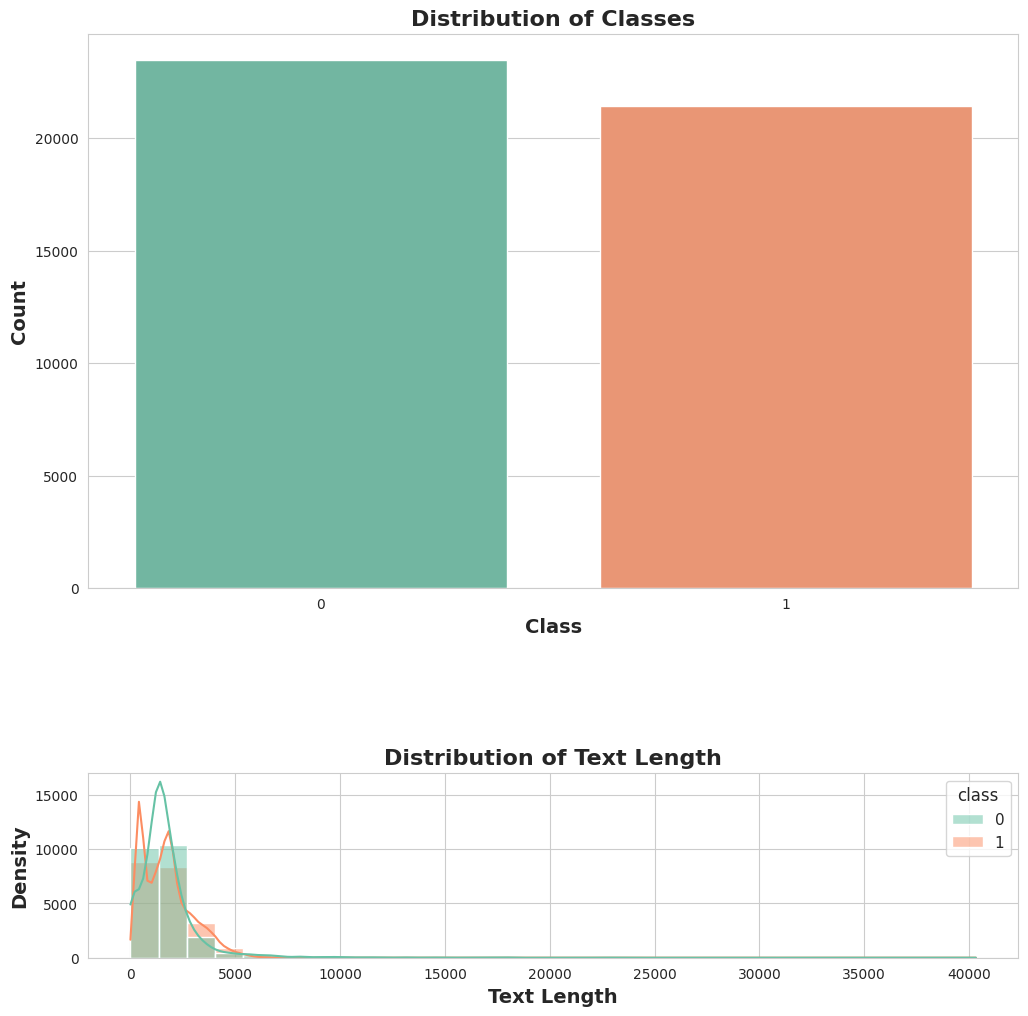

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(12, 12), gridspec_kw={'height_ratios': [3, 1], 'hspace': 0.5})
sns.set(style="whitegrid")

# Plot 1: Distribution of classes
sns.countplot(x='class', data=data_copy, palette='Set2', ax=axes[0])
axes[0].set_title('Distribution of Classes', fontsize=16, weight='bold')
axes[0].set_xlabel('Class', fontsize=14, weight='bold')
axes[0].set_ylabel('Count', fontsize=14, weight='bold')

# Plot 2: Histogram of text length
#x-axis text-length and y-axis density of that text length
data_copy['text_length'] = data_copy['text'].apply(len)
sns.histplot(data_copy, x='text_length', hue='class', kde=True, bins=30, palette='Set2', ax=axes[1])
axes[1].set_title('Distribution of Text Length', fontsize=16, weight='bold')
axes[1].set_xlabel('Text Length', fontsize=14, weight='bold')
axes[1].set_ylabel('Density', fontsize=14, weight='bold')

plt.show()

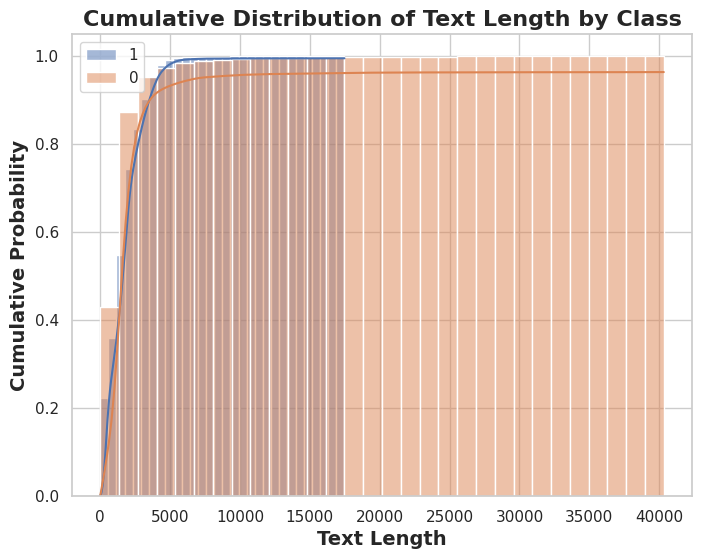

In [ ]:
# Cumulative Distribution Function (CDF) plot of text length by class
plt.figure(figsize=(8, 6))

# CDF Plot of text length
for cls in data_copy['class'].unique():
    sns.histplot(data_copy[data_copy['class'] == cls]['text_length'], cumulative=True, stat='density', bins=30, kde=True, label=cls)
plt.title('Cumulative Distribution of Text Length by Class', fontsize=16, weight='bold')
plt.xlabel('Text Length', fontsize=14, weight='bold')
plt.ylabel('Cumulative Probability', fontsize=14, weight='bold')
plt.legend()

plt.show()

In [ ]:
# from sklearn.feature_extraction.text import CountVectorizer

# # Initialize CountVectorizer with ngram_range=(1, 3)
# count_vectorizer = CountVectorizer(ngram_range=(1, 3))

# # Compute n-gram counts
# ngrams_result = count_vectorizer.fit_transform(data_copy['text'])

# # Print feature names (n-grams)
# print('\nN-grams:')
# print(count_vectorizer.get_feature_names_out())

# # Print n-gram counts
# print('\nN-gram counts:')
# print(ngrams_result)

# # Print n-gram counts in matrix form
# print('\nN-gram counts in matrix form:')
# print(ngrams_result.toarray())


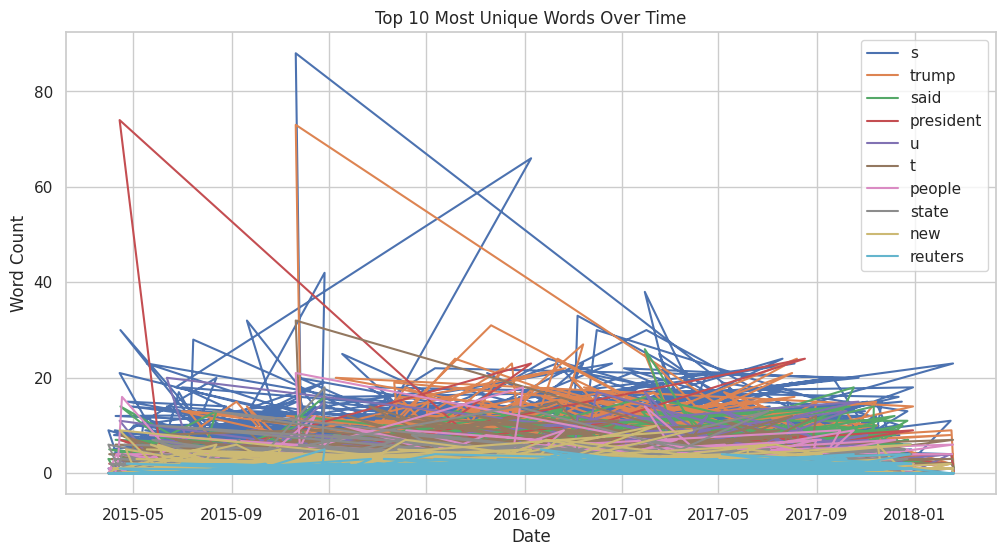

In [ ]:
#plot between most occured words and most occured dates
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from nltk.tokenize import word_tokenize

# Tokenize all text and count unique words
all_text = ' '.join(data_copy['text'].tolist())
tokens = word_tokenize(all_text.lower())  # Tokenize and convert to lowercase
word_counts = Counter(tokens)

# Find the top N most unique words
N = 10  # Change N to the number of top unique words you want
top_unique_words = word_counts.most_common(N)

# Create a DataFrame to store word counts by date
word_counts_by_date = {}
for date, text in zip(data_copy['date'], data_copy['text']):
    tokens = word_tokenize(text.lower())  # Tokenize and convert to lowercase
    word_counts_by_date[date] = Counter(tokens)

word_counts_df = pd.DataFrame(word_counts_by_date).fillna(0).T

# Plot word counts for the top unique words
plt.figure(figsize=(12, 6))
for word, _ in top_unique_words:
    plt.plot(word_counts_df.index, word_counts_df[word], label=word)
plt.title('Top {} Most Unique Words Over Time'.format(N))
plt.xlabel('Date')
plt.ylabel('Word Count')
plt.legend()
plt.show()


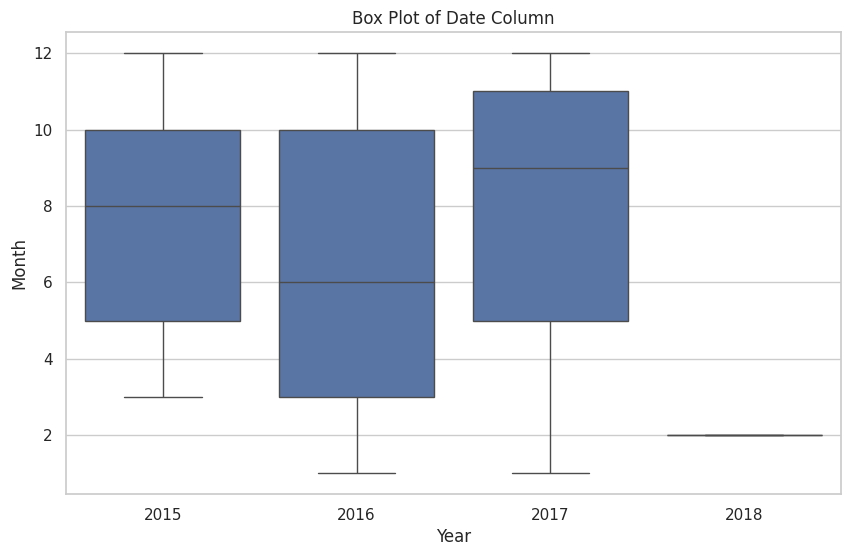

In [ ]:

import seaborn as sns

# Assuming 'data_copy' is your DataFrame containing the 'date' column

# Plot a box plot for the date column
plt.figure(figsize=(10, 6))
sns.boxplot(x=data_copy['date'].dt.year, y=data_copy['date'].dt.month)
plt.title('Box Plot of Date Column')
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()


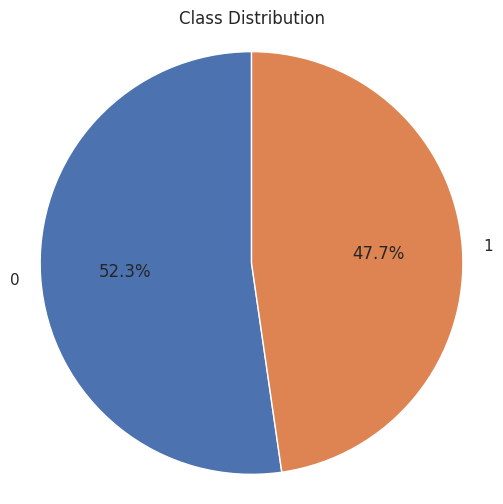

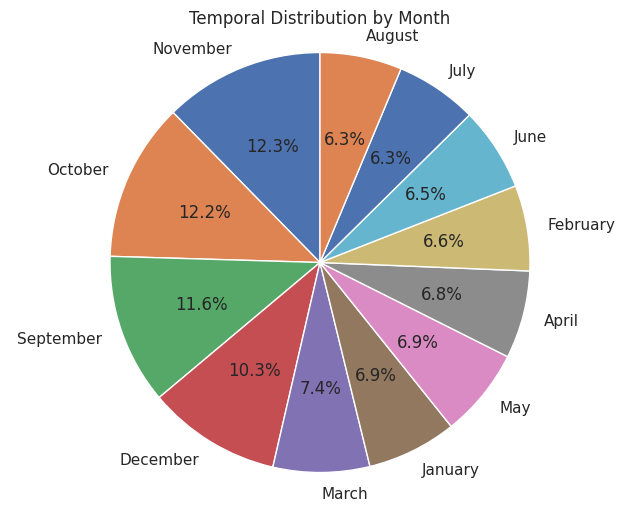

In [ ]:


# Assuming 'data_copy' is your DataFrame containing the columns 'text', 'date', and 'class'

# Class Distribution Pie Chart
class_counts = data_copy['class'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Class Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

# Temporal Distribution Pie Chart (e.g., by month)
# Convert 'date' column to datetime format
data_copy['date'] = pd.to_datetime(data_copy['date'])

# Extract month from 'date' column
data_copy['month'] = data_copy['date'].dt.month_name()

# Create a pie chart to visualize the distribution of data by month
monthly_counts = data_copy['month'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(monthly_counts, labels=monthly_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Temporal Distribution by Month')
plt.axis('equal')
plt.show()


In [ ]:
x=data_copy['text']
y=data_copy['class']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)



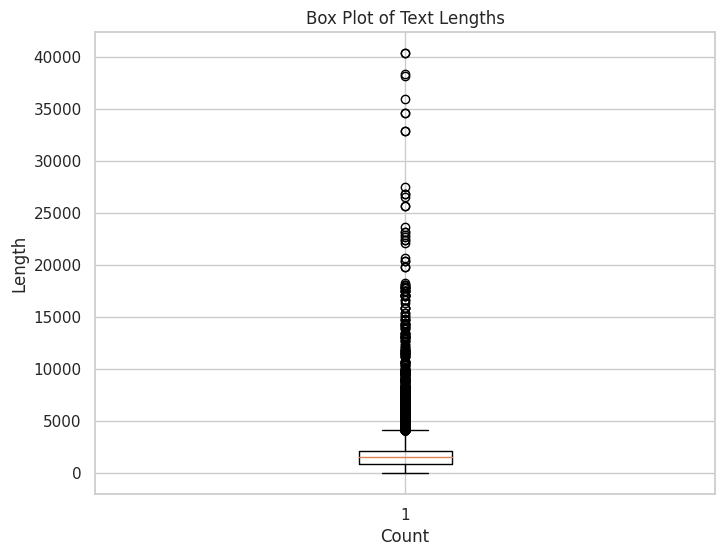

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
x_train1=x_train.copy()
x_train1['text_length'] = x_train.apply(len)
all_lengths = []
for text in x_train1:
    length = len(text)
    all_lengths.append(length)

plt.figure(figsize=(8, 6))
plt.boxplot(all_lengths)
plt.xlabel('Count')
plt.ylabel('Length')
plt.title('Box Plot of Text Lengths')
plt.show()


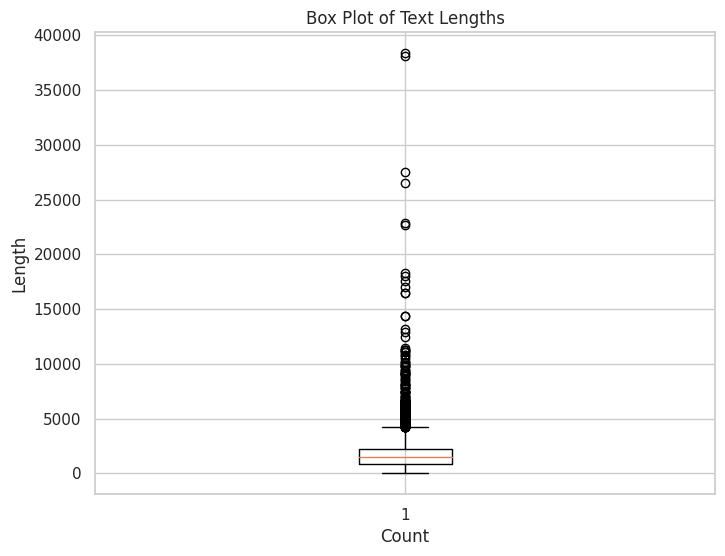

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
x_test1=x_test.copy()
x_test1['text_length'] = x_test.apply(len)
all_lengths = []
for text in x_test1:
    length = len(text)
    all_lengths.append(length)

plt.figure(figsize=(8, 6))
plt.boxplot(all_lengths)
plt.xlabel('Count')
plt.ylabel('Length')
plt.title('Box Plot of Text Lengths')
plt.show()


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()

In [ ]:
xv_train1 = tfidf.fit_transform(x_train)
xv_test1 = tfidf.transform(x_test)

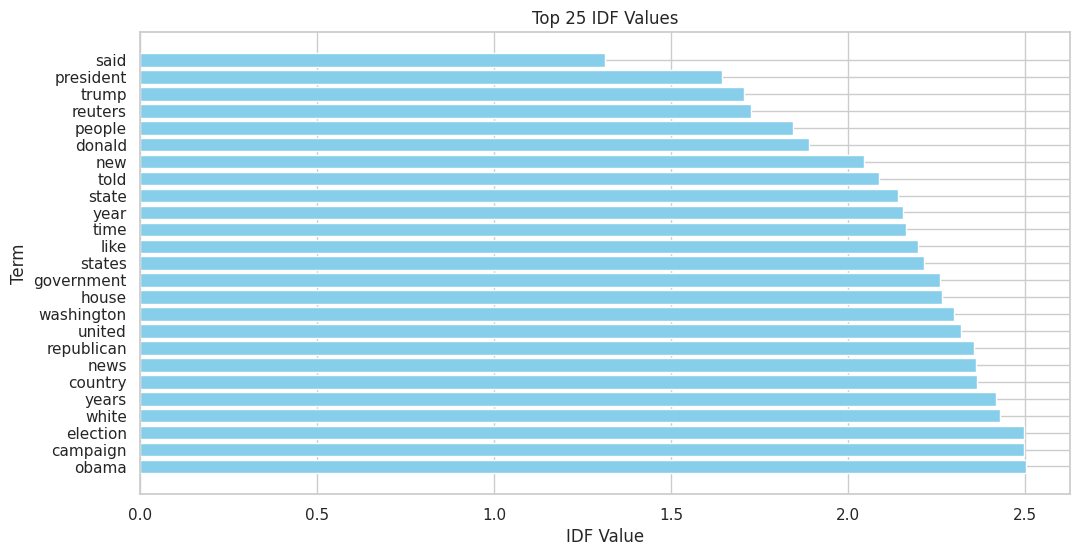

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(data_copy['text'])
idf_values = tfidf.idf_
terms = tfidf.get_feature_names_out()
term_idf = dict(zip(terms, idf_values))
sorted_terms_idf = sorted(term_idf.items(), key=lambda x: x[1])

top_terms_idf = [term for term, score in sorted_terms_idf]
top_idf_values = [score for term, score in sorted_terms_idf]
plt.figure(figsize=(12, 6))
plt.barh(top_terms_idf[:25], top_idf_values[:25], color='skyblue')
plt.xlabel('IDF Value')
plt.ylabel('Term')
plt.title('Top 25 IDF Values')
plt.gca().invert_yaxis()
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression

LR=LogisticRegression()
LR.fit(xv_train1,y_train)

LogisticRegression()

In [ ]:
pred_lr1=LR.predict(xv_test1)

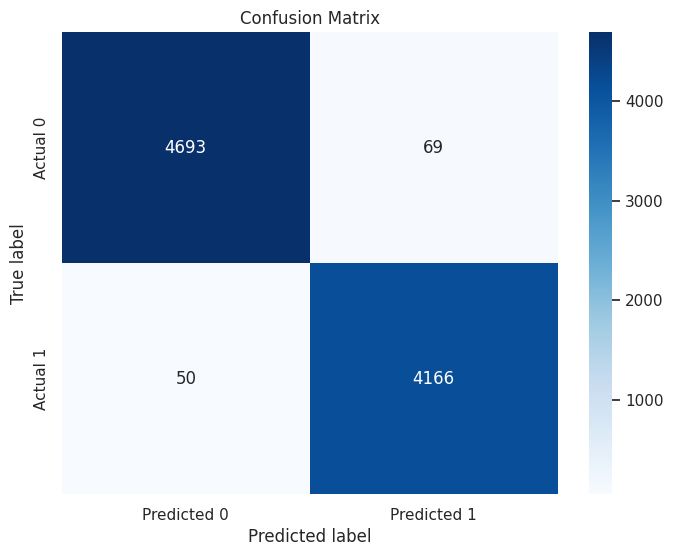

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Example true labels and predicted labels
true_labels = np.array(y_test)
predicted_labels = np.array(pred_lr1)

# Compute confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
accuracy = LR.score(xv_test1, y_test)
print("Accuracy on test data:", accuracy)

Accuracy on test data: 0.9867453775896636


In [ ]:
#above cell code and this code is giving same output the only differ is at comparing
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, pred_lr1)
print("Accuracy on test data:", accuracy)

Accuracy on test data: 0.9867453775896636


In [ ]:
from sklearn.metrics import classification_report

# Assuming LR is your Logistic Regression model
y_pred = LR.predict(xv_test1)

# Generate classification report
report = classification_report(y_test, y_pred)

# Print the report
print("Classification Report of LogisticRegression(TFIDF process):")
print(report)


Classification Report of LogisticRegression(TFIDF process):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4762
           1       0.98      0.99      0.99      4216

    accuracy                           0.99      8978
   macro avg       0.99      0.99      0.99      8978
weighted avg       0.99      0.99      0.99      8978



In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(ngram_range=(1, 3))


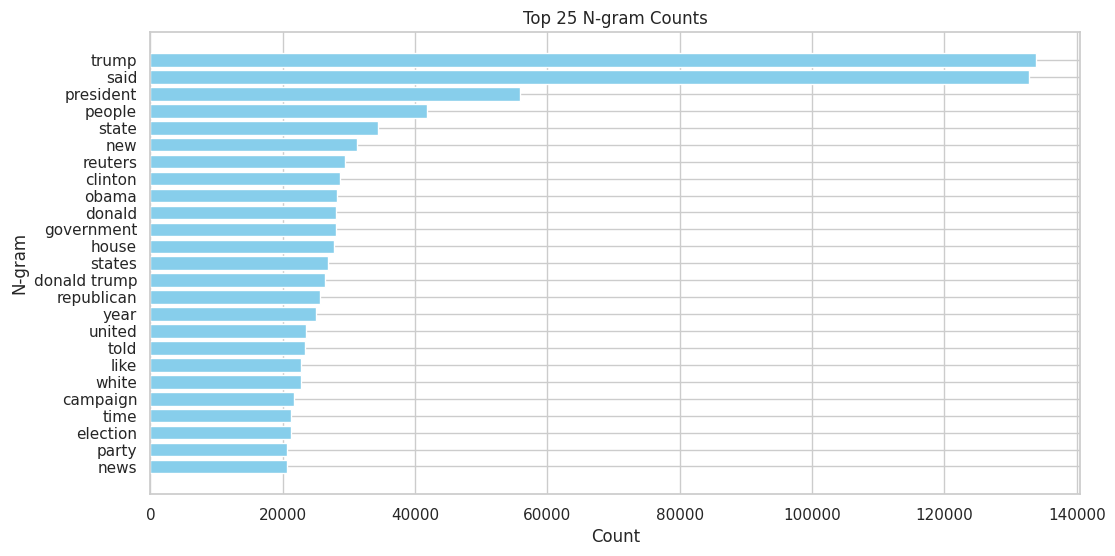

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

# Assuming 'data_copy' is your DataFrame containing the 'text' column

# Initialize CountVectorizer with ngram_range=(1, 3)
count_vectorizer = CountVectorizer(ngram_range=(1, 3))

# Compute n-gram counts
ngrams_result = count_vectorizer.fit_transform(data_copy['text'])

# Get the feature names (n-grams)
ngrams = count_vectorizer.get_feature_names_out()

# Calculate the sum of counts for each n-gram
ngram_counts = ngrams_result.sum(axis=0).tolist()[0]

# Create a dictionary mapping n-grams to their counts
ngram_count_dict = dict(zip(ngrams, ngram_counts))

# Sort n-grams based on their counts
sorted_ngrams = sorted(ngram_count_dict.items(), key=lambda x: x[1], reverse=True)

# Extract top n-grams and their counts
top_ngrams = [ngram for ngram, count in sorted_ngrams[:25]]
top_counts = [count for ngram, count in sorted_ngrams[:25]]

# Plot the n-gram counts
plt.figure(figsize=(12, 6))
plt.barh(top_ngrams, top_counts, color='skyblue')
plt.xlabel('Count')
plt.ylabel('N-gram')
plt.title('Top 25 N-gram Counts')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest count at the top
plt.show()


In [ ]:
xv_train2 = count_vectorizer.fit_transform(x_train)
xv_test2 = count_vectorizer.transform(x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(xv_train2, y_train)

LogisticRegression()

In [ ]:
pred_lr2 = LR.predict(xv_test2)
accuracy = LR.score(xv_test2, y_test)
print("Accuracy on test data:", accuracy)

Accuracy on test data: 0.9971040320784139


In [ ]:
from sklearn.metrics import classification_report

# Assuming LR is your Logistic Regression model
y_pred = LR.predict(xv_test2)

# Generate classification report
report = classification_report(y_test, y_pred)

# Print the report
print("Classification Report of LogisticRegression(NGram):")
print(report)


Classification Report of LogisticRegression(NGram):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4762
           1       1.00      1.00      1.00      4216

    accuracy                           1.00      8978
   macro avg       1.00      1.00      1.00      8978
weighted avg       1.00      1.00      1.00      8978



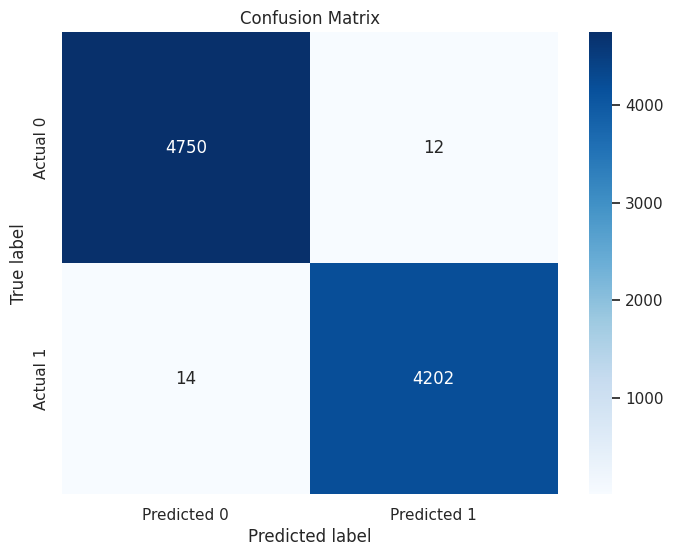

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Example true labels and predicted labels
true_labels = np.array(y_test)
predicted_labels = np.array(pred_lr2)

# Compute confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()


**LDA - Latent Dirichlet Allocation**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Create a CountVectorizer instance and fit it on the training data
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(x_train)

# Transform the testing data using the same CountVectorizer instance
Y= vectorizer.transform(x_test)

# Apply LDA on the training data
lda = LatentDirichletAllocation(n_components=2, random_state=42)
xv_train3 = lda.fit_transform(X)

# Print the shape of the transformed data
print("Transformed Data shape:", xv_train3.shape)

# Transform the testing data using the trained LDA model
xv_test3 = lda.transform(Y)


Transformed Data shape: (35910, 2)


In [ ]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(xv_train3, y_train)

LogisticRegression()

In [ ]:
pred_lr3 = LR.predict(xv_test3)
accuracy = LR.score(xv_test3, y_test)
print("Accuracy on test data:", accuracy)

Accuracy on test data: 0.8673423925150368


In [ ]:
from sklearn.metrics import classification_report

# Assuming LR is your Logistic Regression model
y_pred = LR.predict(xv_test3)

# Generate classification report
report = classification_report(y_test, y_pred)

# Print the report
print("Classification Report of LogisticRegression(LDA):")
print(report)


Classification Report of LogisticRegression(LDA):
              precision    recall  f1-score   support

           0       0.87      0.88      0.88      4762
           1       0.86      0.85      0.86      4216

    accuracy                           0.87      8978
   macro avg       0.87      0.87      0.87      8978
weighted avg       0.87      0.87      0.87      8978



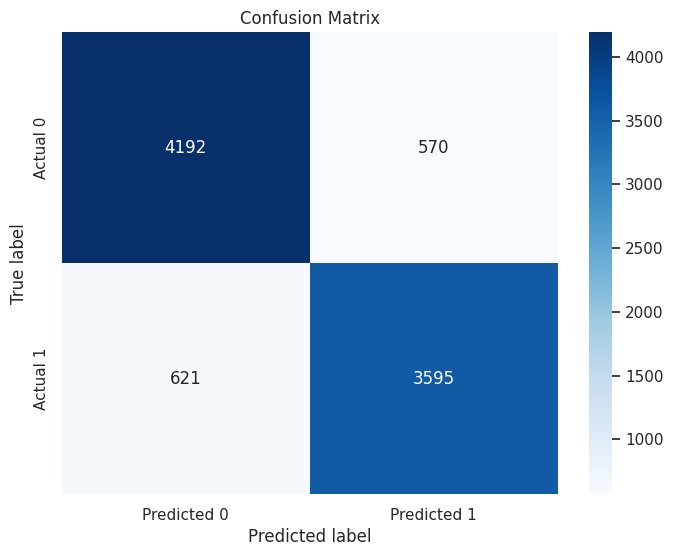

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Example true labels and predicted labels
true_labels = np.array(y_test)
predicted_labels = np.array(pred_lr3)

# Compute confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()


**Glove**


In [ ]:
import nltk
from nltk.tokenize import word_tokenize
import pandas as pd

# Assuming your DataFrame is named df and contains a column named "text"
# Example DataFrame:
# df = pd.DataFrame({'text': ['This is a sample sentence.', 'Another sentence.']})

# Download NLTK resources (only need to do this once)
nltk.download('punkt')

# Tokenization function
def tokenize_text(text):
    return word_tokenize(text)

# Tokenize the text in the "text" column and store the tokenized text in a new column "tokenized_text"
data_copy['tokenized_text'] = data_copy['text'].apply(tokenize_text)

# Print the DataFrame with the new column
print(data_copy)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                                    text  class       date  \
0      barcelona   reuters     barcelona president jo...      1 2017-10-01   
1      beijing   reuters     foreign companies china ...      1 2017-10-19   
2      danang   vietnam   reuters     vietnam release...      1 2017-11-07   
3      harare   reuters     thousands zimbabweans pou...      1 2017-11-21   
4      new delhi   reuters     nearly   indians hold ...      1 2017-11-16   
...                                                  ...    ...        ...   
44893                                                         0 2016-11-16   
44894                                               ouch      0 2016-11-21   
44895                  pretty funny stuff sure watch end      0 2015-04-05   
44896  leftist professors aren t donating chump chang...      0 2015-10-26   
44897  mainstream media anonymous cia sources claim r...      0 2016-12-19   

       text_length     month  \
0             1938   October   

In [ ]:
!pip install gensim


In [ ]:
import gensim
from sklearn.manifold import TSNE
import gensim.downloader as api
glove_model = api.load('glove-wiki-gigaword-300')

In [ ]:
import pandas as pd

# Assuming glove_model is your dictionary containing GloVe vectors
words = []
vectors = []
label=[]
class_array = np.array(data_copy['class'])
# Assuming data_copy is your DataFrame and tokenized_text is a column name
c=0
for token in data_copy['tokenized_text']:
    for word in token:
        if word in glove_model:
            words.append(word)
            label.append(class_array[c])
            vectors.append(glove_model[word])
    c+=1

# Create DataFrame after populating words and vectors
word_vector_df = pd.DataFrame({'word': words, 'vector': vectors,'label': label})


In [ ]:
word_vector_df

,word,vector,label
0,barcelona,"[0.41937, 0.49426, -0.10377, 0.1699, 1.0199, 0...",1
1,reuters,"[-0.27542, 0.22747, -0.1218, 0.62167, -0.38803...",1
2,barcelona,"[0.41937, 0.49426, -0.10377, 0.1699, 1.0199, 0...",1
3,president,"[0.43665, 0.18793, -0.17022, -0.10869, 0.19476...",1
4,josep,"[0.058042, -0.41089, -0.011718, 0.61098, 1.105...",1
...,...,...,...
9890705,entire,"[-0.16541, 0.19376, -0.28079, -0.2343, -0.1232...",0
9890706,story,"[-0.20664, -0.1377, -0.11119, -0.45468, 0.2605...",0
9890707,washington,"[0.033331, -0.10067, 0.00043131, -0.17152, 0.0...",0
9890708,s,"[0.31001, 0.046907, -0.31283, -0.2605, -0.3749...",0


In [ ]:
# label

In [ ]:
# import numpy as np
# from sklearn.manifold import TSNE
# import matplotlib.pyplot as plt

# # Assuming words and vectors are already populated
# # Assuming vectors is a list of word embeddings
# # dim_model = TSNE(n_components=2, perplexity=3, init='pca', random_state=45)

# # Convert vectors list to numpy array
# vectors_array = np.array(vectors)

# # Fit and transform the TSNE model
# fit_model = TSNE(n_components=2, perplexity=3, init='pca', random_state=45).fit_transform(vectors_array)

# # Plot the t-SNE embeddings
# plt.figure(figsize=(10, 8))
# plt.scatter(fit_model[:, 0], fit_model[:, 1], marker='.', color='b')

# # Annotate each point with its corresponding word
# for i, word in enumerate(words):
#     plt.annotate(word, xy=(fit_model[i, 0], fit_model[i, 1]), xytext=(5, 2),
#                  textcoords='offset points', ha='right', va='bottom', fontsize=8)

# plt.title('t-SNE Visualization of GloVe Word Embeddings')
# plt.xlabel('t-SNE Dimension 1')
# plt.ylabel('t-SNE Dimension 2')
# plt.show()


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Assuming words, vectors, and labels are already populated
# Assuming vectors is a list of word embeddings, and labels is a list of corresponding labels

# Convert vectors and labels lists to numpy arrays
X = np.array(vectors)
y = np.array(label)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train logistic regression model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)

# Predict labels for the test set
y_pred = logistic_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


In [ ]:
from sklearn.metrics import classification_report

# Assuming LR is your Logistic Regression model
y_pred = LR.predict(X_test)

# Generate classification report
report = classification_report(y_test, y_pred)

# Print the report
print("Classification Report of LogisticRegression(Glove):")
print(report)


In [ ]:
# Draw confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

*XGBoosting with LDA*

In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import log_loss, accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from datetime import datetime
from dateutil import parser

# Binary cross-entropy loss function and its gradient
def binary_cross_entropy_loss(y, probs):
    return -(y * np.log(probs) + (1 - y) * np.log(1 - probs))

def binary_cross_entropy_gradient(y, probs):
    return (probs - y) / (probs * (1 - probs))

# Sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Build a Decision Tree to predict gradients
def build_gradient_tree(X, gradients, max_depth=3):
    tree = DecisionTreeRegressor(max_depth=max_depth)
    tree.fit(X, gradients)
    return tree

# Obtain log forecasts and transform to probabilities
def log_forecasts_to_probs(initial_probs, tree, X, learning_rate=0.1):
    log_forecasts = np.log(initial_probs / (1 - initial_probs)) - learning_rate * tree.predict(X)
    return sigmoid(log_forecasts)

# Produce final predictions
def predict(initial_probs, tree, X, learning_rate=0.1):
    log_forecasts = np.log(initial_probs / (1 - initial_probs)) - learning_rate * tree.predict(X)
    return sigmoid(log_forecasts)

# Convert date strings to numerical representation (Unix timestamp)
# Convert date strings to numerical representation (Unix timestamp)
def convert_to_timestamp(date_string):
    try:
        # Convert datetime object to string and then parse
        date_string = date_string.strftime("%d-%b-%y")  # Adjust format as needed
        return datetime.strptime(date_string, "%d-%b-%y").timestamp() // 10**9
    except AttributeError:
        # If it's already a string, just parse
        try:
            return datetime.strptime(date_string.strip(), "%d-%b-%y").timestamp() // 10**9
        except ValueError:
            return np.nan  # Return NaN for invalid date strings



# Load your data
# Assuming 'data_copy' is your DataFrame containing the data
# Replace 'text', 'date', and 'class' with the actual column names in your DataFrame
X_text = data_copy['text']  # Text data
X_date = data_copy['date']  # Date data
y = data_copy['class']  # Target variable

# Convert text data to numeric features using TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust max_features as needed
X_tfidf = tfidf_vectorizer.fit_transform(X_text)

# Convert date strings to numerical representation (Unix timestamp)
X_date_numerical = X_date.apply(convert_to_timestamp)

# Concatenate date and TF-IDF features
X = np.hstack((X_date_numerical.values.reshape(-1, 1), X_tfidf.toarray()))

# Drop rows with missing values
valid_indices = ~np.isnan(X).any(axis=1)
X = X[valid_indices]
y = y[valid_indices]

# Split data into train and test sets with a 90-10 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize probabilities with a constant value (e.g., 0.5)
initial_probs_train = np.full(y_train.shape, 0.5)
initial_probs_test = np.full(y_test.shape, 0.5)

# Gradient boosting iterations
num_iterations = 100
for iteration in range(num_iterations):
    # Calculate gradients
    gradients_train = binary_cross_entropy_gradient(y_train, initial_probs_train)
    gradients_test = binary_cross_entropy_gradient(y_test, initial_probs_test)

    # Build a Decision Tree to predict gradients
    gradient_tree = build_gradient_tree(X_train, gradients_train, max_depth=3)

    # Update probabilities
    initial_probs_train = log_forecasts_to_probs(initial_probs_train, gradient_tree, X_train, learning_rate=0.1)
    initial_probs_test = log_forecasts_to_probs(initial_probs_test, gradient_tree, X_test, learning_rate=0.1)

# Produce final predictions
predictions_train = predict(initial_probs_train, gradient_tree, X_train, learning_rate=0.1)
predictions_test = predict(initial_probs_test, gradient_tree, X_test, learning_rate=0.1)

# Calculate log loss and accuracy for train set
log_loss_score_train = log_loss(y_train, predictions_train)
preds_binary_train = [1 if pred >= 0.5 else 0 for pred in predictions_train]
accuracy_train = accuracy_score(y_train, preds_binary_train)

# Calculate log loss and accuracy for test set
log_loss_score_test = log_loss(y_test, predictions_test)
preds_binary_test = [1 if pred >= 0.5 else 0 for pred in predictions_test]
accuracy_test = accuracy_score(y_test, preds_binary_test)

# Calculate confusion matrix for train set
conf_matrix_train = confusion_matrix(y_train, preds_binary_train)
print("Train Data:")
print("Confusion Matrix:")
print(conf_matrix_train)
print("Log Loss:", log_loss_score_train)
print("Accuracy:", accuracy_train)

# Calculate confusion matrix for test set
conf_matrix_test = confusion_matrix(y_test, preds_binary_test)
print("\nTest Data:")
print("Confusion Matrix:")
print(conf_matrix_test)
print("Log Loss:", log_loss_score_test)
print("Accuracy:", accuracy_test)

In [ ]:
from sklearn.metrics import classification_report

# Generate predictions using your model (assuming LR is your model)
y_pred = predict(initial_probs_test, gradient_tree, X_test, learning_rate=0.1)

# Convert predictions to binary labels
y_pred_binary = np.where(y_pred >= 0.5, 1, 0)

# Generate the classification report
report = classification_report(y_test, y_pred_binary)

# Print the report
print("Classification Report of XGBoosting with LDA:")
print(report)


**LSTM -Long Short Term Memory**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense


In [ ]:

# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data_copy['tokenized_text'])
sequences = tokenizer.texts_to_sequences(data_copy['tokenized_text'])
word_index = tokenizer.word_index
max_sequence_length = max([len(seq) for seq in sequences])

# Pad sequences to make them uniform length
X = pad_sequences(sequences, maxlen=max_sequence_length)
y = data['class']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = Sequential()
model.add(Embedding(input_dim=len(word_index) + 1, output_dim=100, input_length=max_sequence_length))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


In [ ]:
from sklearn.metrics import classification_report

# Generate predictions using your model
y_pred = model.predict(X_test)

# Convert predictions to binary labels if needed
# For example, if your model outputs probabilities and you want to threshold them
y_pred_binary = (y_pred >= 0.5).astype(int)

# Generate classification report
report = classification_report(y_test, y_pred_binary)

# Print the classification report
print("Classification Report for LSTM -Long Short Term Memory:")
print(report)

# Evaluate the model using model.evaluate
loss, accuracy = model.evaluate(X_test, y_test)

# Print the evaluation results
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


**Bidirectional LSTM**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense


In [ ]:

# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data_copy['tokenized_text'])
sequences = tokenizer.texts_to_sequences(data_copy['tokenized_text'])
word_index = tokenizer.word_index
max_sequence_length = max([len(seq) for seq in sequences])

# Pad sequences to make them uniform length
X = pad_sequences(sequences, maxlen=max_sequence_length)
y = data['class']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = Sequential()
model.add(Embedding(input_dim=len(word_index) + 1, output_dim=100, input_length=max_sequence_length))
model.add(Bidirectional(LSTM(100)))
model.add(Dense(1, activation='sigmoid'))


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

In [ ]:
from sklearn.metrics import classification_report

# Generate predictions using your model
y_pred = model.predict(X_test)

# Convert predictions to binary labels if needed
# For example, if your model outputs probabilities and you want to threshold them
y_pred_binary = (y_pred >= 0.5).astype(int)

# Generate classification report
report = classification_report(y_test, y_pred_binary)

# Print the classification report
print("Classification Report for BILSTM -Bidirectional Long Short Term Memory:")
print(report)

# Evaluate the model using model.evaluate
loss, accuracy = model.evaluate(X_test, y_test)

# Print the evaluation results
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


**CNN-BILSTM**

Difference between Bidirectional LSTM and CNN Bidirectional LSTM:
The primary difference between Bidirectional LSTM and CNN Bidirectional LSTM lies in their initial layers and the types of features they extract:

Bidirectional LSTM directly operates on sequential data, considering both past and future context through its bidirectional nature.
CNN Bidirectional LSTM, on the other hand, first employs convolutional layers for feature extraction, which can capture local patterns efficiently. These extracted features are then passed to the bidirectional LSTM layers, which capture long-range dependencies in the sequence.
In summary, while both architectures utilize bidirectional LSTM layers, CNN Bidirectional LSTM incorporates convolutional layers for initial feature extraction, which can be beneficial for certain types of sequential data where local patterns are important.

In [ ]:
## Creating model Using CNN
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional, Dropout, BatchNormalization

embedding_vector_features=40
model=Sequential()
model.add(Embedding(input_dim=len(word_index) + 1, output_dim=100, input_length=max_sequence_length))
model.add(Dropout(0.3))
# no of filters , filter or kernel size ,activation function and default stride is 1
model.add(Conv1D(32, 5, activation='relu'))
model.add(MaxPool1D())

model.add(Conv1D(32, 5, activation='relu'))
model.add(MaxPool1D())

model.add(Bidirectional(LSTM(100)))
model.add(Dropout(0.3))
# 1 node
model.add(Dense(1,activation='sigmoid'))
# optimizer='adam' used fo backpropogation to reduce error
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

In [ ]:
# Training the model
model.fit(X_train, y_train, batch_size=64, validation_data=(X_test, y_test), epochs = 10)

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

In [ ]:
from sklearn.metrics import classification_report

# Generate predictions using your model
y_pred = model.predict(X_test)

# Convert predictions to binary labels if needed
# For example, if your model outputs probabilities and you want to threshold them
y_pred_binary = (y_pred >= 0.5).astype(int)

# Generate classification report
report = classification_report(y_test, y_pred_binary)

# Print the classification report
print("Classification Report CNN+BILSTM:")
print(report)

# Evaluate the model using model.evaluate
loss, accuracy = model.evaluate(X_test, y_test)

# Print the evaluation results
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


**BERT (Bidirectional Encoder Representations from Transformers):**

In [ ]:
!pip install transformers

import torch
from transformers import BertTokenizer

In [ ]:
PRETRAINED_MODEL_NAME = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(PRETRAINED_MODEL_NAME)

In [ ]:
coloumns=['text','class']
df=data_merge[coloumns]
df.head()

In [ ]:
df.shape

In [ ]:
train_val_df = df.sample(frac = 0.8)
test_df = df.drop(train_val_df.index)

train_df = train_val_df.sample(frac = 0.8)
val_df = train_val_df.drop(train_df.index)

# Reset Index
train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

print('trainset size:', train_df.shape)
print('valset size:', val_df.shape)
print('testset size:', test_df.shape)

In [ ]:

train_df.to_csv('train.tsv', sep='\t', index=False)
val_df.to_csv('val.tsv', sep='\t', index=False)
test_df.to_csv('test.tsv', sep='\t', index=False)

In [ ]:
from torch.utils.data import Dataset

class FakeNewsDataset(Dataset):
    def __init__(self, mode, tokenizer, max_len):
        assert mode in ['train', 'val', 'test']
        self.mode = mode
        self.df = pd.read_csv(mode + '.tsv', sep='\t').fillna("")
        self.len = len(self.df)
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __getitem__(self, idx):
        statement, label = self.df.iloc[idx, :].values
        encoding = self.tokenizer.encode_plus(
            statement,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=True,
            padding='max_length',
            truncation=True
        )
        input_ids = encoding['input_ids']
        token_type_ids = encoding['token_type_ids']
        attention_mask = encoding['attention_mask']
        label_tensor = torch.tensor(label)
        return input_ids, token_type_ids, attention_mask, label_tensor

    def __len__(self):
        return self.len

# Initialize Datasets for Transformation
MAX_LEN = 128
trainset = FakeNewsDataset('train', tokenizer=tokenizer, max_len=MAX_LEN)
valset = FakeNewsDataset('val', tokenizer=tokenizer, max_len=MAX_LEN)
testset = FakeNewsDataset('test', tokenizer=tokenizer, max_len=MAX_LEN)

In [ ]:

# sample_idx = 0

# statement, label = trainset.df.iloc[sample_idx].values

# tokens_tensor, segments_tensor, label_tensor = trainset[sample_idx]

# tokens = tokenizer.convert_ids_to_tokens(tokens_tensor.tolist())
# combined_text = " ".join(tokens)

# print(f"""
# original_statement:
# {statement}

# tokens:
# {tokens}

# label: {label}

# --------------------

# tokens_tensor:
# {tokens_tensor}

# segments_tensor:
# {segments_tensor}

# label_tensor:
# {label_tensor}

# """)

In [ ]:
from torch.utils.data import DataLoader
from torch.nn.utils.rnn import pad_sequence

# 這個函式的輸入 `samples` 是一個 list，裡頭的每個 element 都是
# 剛剛定義的 `FakeNewsDataset` 回傳的一個樣本，每個樣本都包含 3 tensors：
# - tokens_tensor
# - segments_tensor
# - label_tensor
# 它會對前兩個 tensors 作 zero padding，並產生前面說明過的 masks_tensors
def create_mini_batch(samples):
    input_ids, token_type_ids, attention_masks, labels = zip(*samples)
    input_ids = torch.tensor(input_ids)
    token_type_ids = torch.tensor(token_type_ids)
    attention_masks = torch.tensor(attention_masks)
    labels = torch.tensor(labels)
    return input_ids, token_type_ids, attention_masks, labels

# Initialize DataLoaders
BATCH_SIZE = 16
trainloader = DataLoader(trainset, batch_size=BATCH_SIZE, collate_fn=create_mini_batch)
valloader = DataLoader(valset, batch_size=BATCH_SIZE, collate_fn=create_mini_batch)
testloader = DataLoader(testset, batch_size=BATCH_SIZE, collate_fn=create_mini_batch)


In [ ]:
from transformers import BertForSequenceClassification
from IPython.display import display, clear_output

PRETRAINED_MODEL_NAME = "bert-base-uncased"
NUM_LABELS = 2

model = BertForSequenceClassification.from_pretrained(
    PRETRAINED_MODEL_NAME, num_labels=NUM_LABELS)

clear_output()

print("""
name             module
-----------------------""")
for name, module in model.named_children():
    if name == "bert":
        for n, _ in module.named_children():
            print(f"{name}:{n}")
    else:
        print("{:16} {}".format(name, module))


In [ ]:

from transformers import BertForSequenceClassification
from IPython.display import display, clear_output
# %%time
from sklearn.metrics import accuracy_score
from tqdm.notebook import tqdm

# Model training
# NUM_LABELS = 2
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("device:", device)
model = BertForSequenceClassification.from_pretrained(PRETRAINED_MODEL_NAME, num_labels=NUM_LABELS)
model = model.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-5)
NUM_EPOCHS = 3

for epoch in range(NUM_EPOCHS):
    train_loss = 0.0
    train_acc = 0.0

    loop = tqdm(trainloader)
    for batch_idx, data in enumerate(loop):
        input_ids, token_type_ids, attention_masks, labels = [t.to(device) for t in data]

        optimizer.zero_grad()

        outputs = model(input_ids=input_ids,
                        token_type_ids=token_type_ids,
                        attention_mask=attention_masks,
                        labels=labels)

        loss = outputs.loss
        loss.backward()
        optimizer.step()

        logits = outputs.logits
        _, pred = torch.max(logits.data, 1)
        train_acc = accuracy_score(pred.cpu().tolist(), labels.cpu().tolist())

        train_loss += loss.item()

        loop.set_description(f"Epoch [{epoch+1}/{NUM_EPOCHS}]")
        loop.set_postfix(acc=train_acc, loss=train_loss)

In [ ]:
# data = next(iter(trainloader))

# tokens_tensors, segments_tensors, masks_tensors, label_ids = data

# print(f"""
# tokens_tensors.shape   = {tokens_tensors.shape}
# {tokens_tensors}
# ------------------------
# segments_tensors.shape = {segments_tensors.shape}
# {segments_tensors}
# ------------------------
# masks_tensors.shape    = {masks_tensors.shape}
# {masks_tensors}
# ------------------------
# label_ids.shape        = {label_ids.shape}
# {label_ids}
# """)

In [ ]:
# from transformers import BertForSequenceClassification
# from IPython.display import display, clear_output

# PRETRAINED_MODEL_NAME = "bert-base-uncased"
# NUM_LABELS = 2

# model = BertForSequenceClassification.from_pretrained(
#     PRETRAINED_MODEL_NAME, num_labels=NUM_LABELS)

# clear_output()

# print("""
# name             module
# -----------------------""")
# for name, module in model.named_children():
#     if name == "bert":
#         for n, _ in module.named_children():
#             print(f"{name}:{n}")
#     else:
#         print("{:16} {}".format(name, module))


In [ ]:
# model.config

In [ ]:
# # %%time
# from sklearn.metrics import accuracy_score
# from tqdm.notebook import tqdm

# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# print("device:", device)
# model = model.to(device)

# model.train()
# optimizer = torch.optim.Adam(model.parameters(), lr=1e-5)
# NUM_EPOCHS = 3

# for epoch in range(NUM_EPOCHS):
#     train_loss = 0.0
#     train_acc = 0.0

#     loop = tqdm(trainloader)
#     for batch_idx, data in enumerate(loop):
#         tokens_tensors, segments_tensors, masks_tensors, labels = [t.to(device) for t in data]

#         # 將參數梯度歸零
#         optimizer.zero_grad()

#         outputs = model(input_ids=tokens_tensors,
#                         token_type_ids=segments_tensors,
#                         attention_mask=masks_tensors,
#                         labels=labels)

#         loss = outputs[0]
#         loss.backward()
#         optimizer.step()

#         logits = outputs[1]
#         _, pred = torch.max(logits.data, 1)
#         train_acc = accuracy_score(pred.cpu().tolist() , labels.cpu().tolist())

#         # 紀錄當前 batch loss
#         train_loss += loss.item()

#         # if batch_idx == len(trainloader)-1:
#         #     _, acc = get_predictions(model, trainloader, compute_acc=True)

#         loop.set_description(f"Epoch [{epoch+1}/{NUM_EPOCHS}]")
#         loop.set_postfix(acc = train_acc, loss = train_loss)

In [ ]:

torch.save(model, './best_model.pth')
print('Model saved!')

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

true = []
predictions = []

with torch.no_grad():
    model.eval()
    for data in testloader:
        if next(model.parameters()).is_cuda:
            data = [t.to(device) for t in data if t is not None]

        tokens_tensors, segments_tensors, masks_tensors, labels = data  # Unpack data tuple

        test_outputs = model(input_ids=tokens_tensors,
                             token_type_ids=segments_tensors,
                             attention_mask=masks_tensors)

        logits = test_outputs[0]
        _, pred = torch.max(logits.data, 1)

        true.extend(labels.cpu().tolist())
        predictions.extend(pred.cpu().tolist())

# Compute confusion matrix
cm = confusion_matrix(true, predictions, labels=[1, 0], normalize='true')

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Real', 'Fake'])
disp.plot()

# Compute accuracy
acc = accuracy_score(predictions, true)
print('Accuracy:', acc)


In [ ]:
df = pd.DataFrame({"pred_label": predictions})

df_pred = pd.concat([testset.df.loc[:, ['text']],
                          testset.df.loc[:, ['class']],
                          df.loc[:, 'pred_label']], axis=1)
# df_pred.to_csv('bert_1_prec_training_samples.csv', index=False)
df_pred

In [ ]:
from sklearn.metrics import classification_report

# Assuming df_pred contains 'class' and 'pred_label' columns
print("Classification Report of BERT (Bidirectional Encoder Representations from Transformers):")

print(classification_report(df_pred['class'], df_pred['pred_label']))


#Random Forest

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming x contains your text data and y contains corresponding labels

# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=10000)  # You can adjust max_features as needed

# Fit TF-IDF vectorizer and transform train data
x_train_tfidf = tfidf_vectorizer.fit_transform(x_train)

# Transform test data using the fitted vectorizer
x_test_tfidf = tfidf_vectorizer.transform(x_test)

# Initialize Random Forest classifier
RF = RandomForestClassifier()

# Train the model
RF.fit(x_train_tfidf, y_train)

# Make predictions on test data
pred_rf = RF.predict(x_test_tfidf)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, pred_rf)
print("Accuracy on test data with Random Forest:", accuracy_rf)

# Compute confusion matrix
cm_rf = confusion_matrix(y_test, pred_rf)

# Plot confusion matrix for Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, cmap='Blues', fmt='g', xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix - Random Forest')
plt.show()

In [ ]:
# Calculate accuracy
accuracy_rf = accuracy_score(y_test, pred_rf)
print("Accuracy on test data with Random Forest:", accuracy_rf)

In [ ]:
from sklearn.metrics import classification_report

# Assuming LR is your Logistic Regression model
y_pred = RF.predict(x_test_tfidf)


# Generate classification report
report = classification_report(y_test, y_pred)

# Print the report
print("Classification Report of LogisticRegression(TFIDF process):")
print(report)
